In [2]:
import matplotlib.pyplot as plt
import matplotlib as matplt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import math
import statistics
import tables

np.set_printoptions(precision=3, suppress=True)

from matplotlib.gridspec import GridSpec

In [3]:
print (np.__version__)
print (pd.__version__)
print (sns.__version__)
print (matplt.__version__)
print (tables.__version__)

1.22.3
1.4.1
0.11.2
3.5.1
3.7.0


# NOMIG

In [4]:
IrrGEMM_0_hd5 = pd.HDFStore("./traces/Irr_GEMM-0.prof.h5")
IrrGEMM_0_events = IrrGEMM_0_hd5.events
IrrGEMM_0_hd5.close()

In [5]:
IrrGEMM_1_hd5 = pd.HDFStore("./traces/Irr_GEMM-1.prof.h5")
IrrGEMM_1_events = IrrGEMM_1_hd5.events
IrrGEMM_1_hd5.close()


In [6]:
IrrGEMM_2_hd5 = pd.HDFStore("./traces/Irr_GEMM-2.prof.h5")
IrrGEMM_2_events = IrrGEMM_2_hd5.events
IrrGEMM_2_hd5.close()


In [7]:
IrrGEMM_3_hd5 = pd.HDFStore("./traces/Irr_GEMM-3.prof.h5")
IrrGEMM_3_events = IrrGEMM_3_hd5.events
IrrGEMM_3_hd5.close()


In [9]:

IrrGEMM_3_events['taskpool_id'].unique()


array([2, 4, -1, 6, 8, 10, 12], dtype=object)

In [10]:
def filter_data_frame(df):
   
    df = df.astype(float)
    

    # remove the first run (warmup run)
    df = df.loc[ df['taskpool_id'] == 6 ] 

    #Change all timimng values fron ns to ms
    
    df.reset_index(drop=True, inplace=True)
    
    
    return df





In [54]:
list(IrrGEMM_0.columns)

['g',
 'nb_first_stage_in_h2d',
 'rp',
 'mcp',
 'select_time',
 'complete_time',
 'first_stage_in_time_end',
 'tp_nb_tasks',
 'sec_stage_in_time_start',
 'nb_sec_stage_in_d2d',
 'node_id',
 'k',
 'sec_waiting_tasks',
 'nb_first_stage_in',
 'p',
 'mrp',
 'begin',
 'cp',
 'task_progress',
 'complete_time_end',
 'mp',
 'type',
 'exec_time_start',
 'task_type',
 'stage_out_time_start',
 'dc_dataid',
 'first_waiting_tasks',
 'clock_speed',
 'taskpool_id',
 'nb_sec_stage_in_h2d',
 'second_queue_time',
 'ready_tasks',
 'exec_stream_index',
 'mig_status',
 'stream_id',
 'prank',
 'qrank',
 'task_count',
 'device_index',
 'id',
 'first_queue_time',
 'tcid',
 'dc_key',
 'n',
 'exec_time_end',
 'class_id',
 'first_stage_in_time_start',
 'complete_time_start',
 'trc',
 'stage_out_time_end',
 'nb_sec_stage_in',
 'nb_first_stage_in_d2d',
 'mrp_p',
 'end',
 'priority',
 'sec_stage_in_time_end',
 'flags',
 'm',
 'src',
 'dst',
 'tid',
 'tpid',
 'msg_size',
 'size',
 'knext',
 'kprev',
 'dc_padding',
 

In [12]:
IrrGEMM_0 = filter_data_frame(IrrGEMM_0_events)


In [13]:
IrrGEMM_0.head()


,g,nb_first_stage_in_h2d,rp,mcp,select_time,complete_time,first_stage_in_time_end,tp_nb_tasks,sec_stage_in_time_start,nb_sec_stage_in_d2d,...,dst,tid,tpid,msg_size,size,knext,kprev,dc_padding,data_key,dc_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.045214e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
IrrGEMM_1 = filter_data_frame(IrrGEMM_1_events)

In [15]:
IrrGEMM_0['ready_tasks'].unique()

array([  nan,    0.,  176., ..., 3231., 3103., 3052.])

Text(0.5, 0, 'Execution time(ns)')

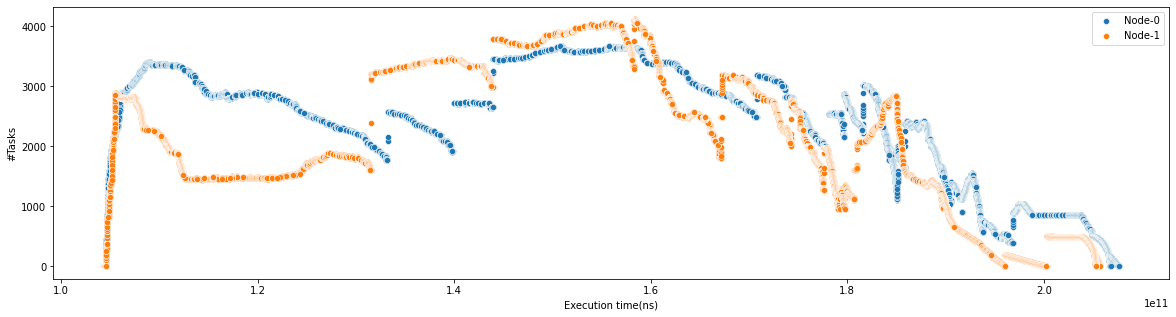

In [16]:


fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=IrrGEMM_0, x="complete_time", y="ready_tasks", ax=ax0, label='Node-0')
sns.scatterplot(data=IrrGEMM_1, x="complete_time", y="ready_tasks", ax=ax0, label='Node-1')
ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)




#fig.savefig('Irr_GEMM.png', dpi=300, bbox_inches='tight')



# MIG

In [18]:
IrrGEMM_mig_0_hd5 = pd.HDFStore("./traces/Irr_GEMM_mig-0.prof.h5")
IrrGEMM_mig_0_events = IrrGEMM_mig_0_hd5.events
IrrGEMM_mig_0_hd5.close()


In [22]:
IrrGEMM_mig_1_hd5 = pd.HDFStore("./traces/Irr_GEMM_mig-1.prof.h5")
IrrGEMM_mig_1_events = IrrGEMM_mig_1_hd5.events
IrrGEMM_mig_1_hd5.close()


In [19]:
IrrGEMM_mig_2_hd5 = pd.HDFStore("./traces/Irr_GEMM_mig-2.prof.h5")
IrrGEMM_mig_2_events = IrrGEMM_mig_2_hd5.events
IrrGEMM_mig_2_hd5.close()


In [39]:
IrrGEMM_mig_3_hd5 = pd.HDFStore("./traces/Irr_GEMM_mig-3.prof.h5")
IrrGEMM_mig_3_events = IrrGEMM_mig_3_hd5.events
IrrGEMM_mig_3_hd5.close()


In [40]:
IrrGEMM_mig_0 = filter_data_frame(IrrGEMM_mig_0_events)
IrrGEMM_mig_1 = filter_data_frame(IrrGEMM_mig_1_events)
IrrGEMM_mig_2 = filter_data_frame(IrrGEMM_mig_2_events)
IrrGEMM_mig_3 = filter_data_frame(IrrGEMM_mig_3_events)

In [41]:
#list(IrrGEMM_mig_2.columns)

In [46]:
IrrGEMM_mig_0_events['ready_tasks'].unique()

array([None, 0.0, 8.0, ..., 4206.0, 4207.0, 4108.0], dtype=object)

Text(0.5, 0, 'Execution time(ns)')

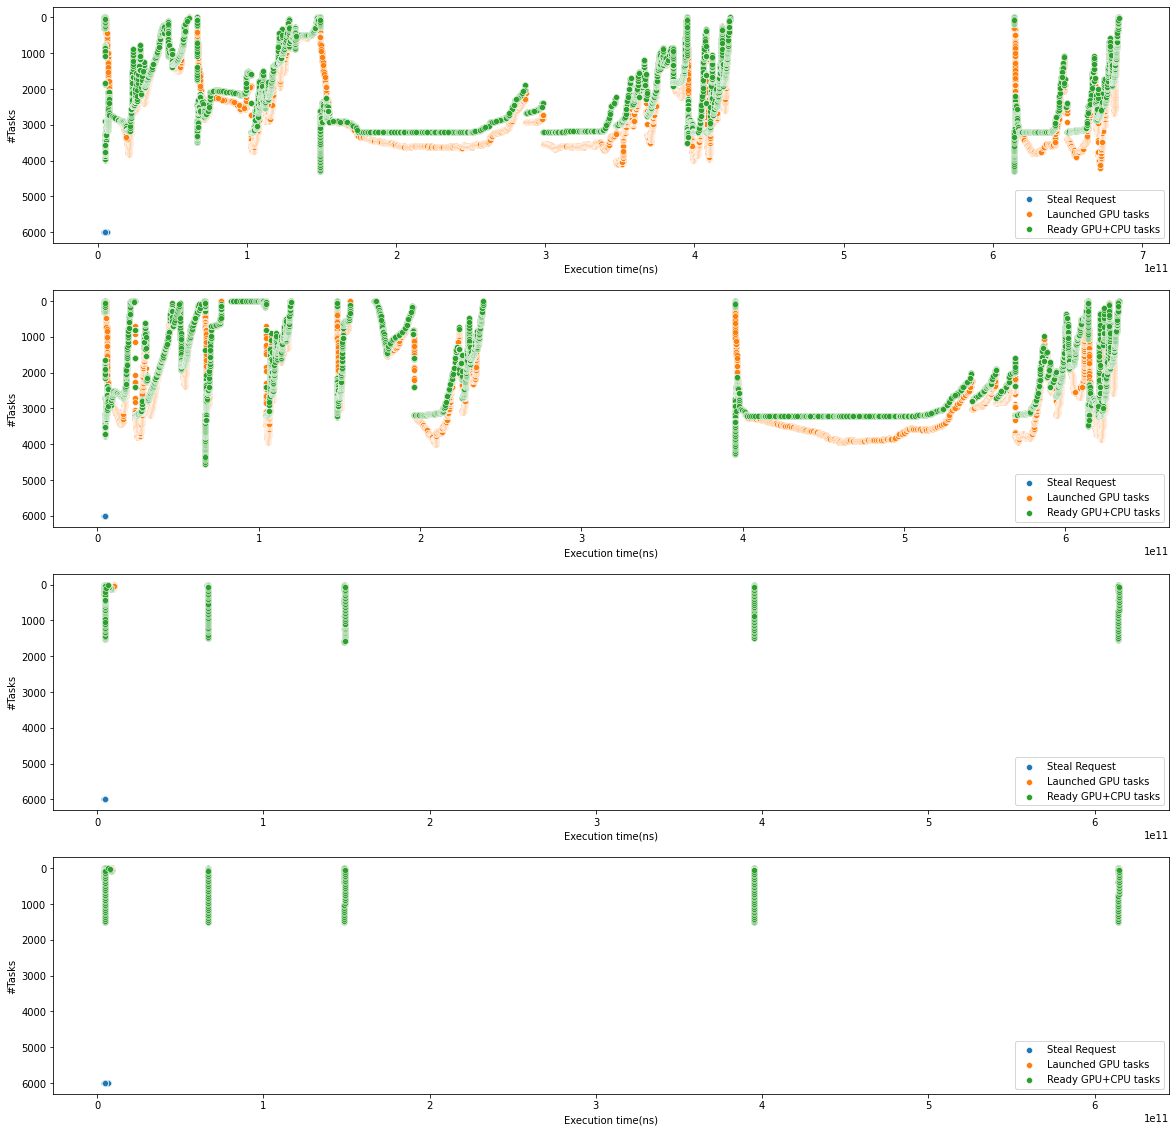

In [59]:


fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows=4, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])


sns.scatterplot(data=IrrGEMM_mig_0_events, x="recv_time", y=6000, ax=ax0, label='Steal Request')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="complete_time", y="ready_tasks", ax=ax0, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)

ax1 = fig.add_subplot(gs[1, 0])


sns.scatterplot(data=IrrGEMM_mig_1_events, x="recv_time", y=6000, ax=ax1, label='Steal Request')

sns.scatterplot(data=IrrGEMM_mig_1_events, x="complete_time", y="ready_tasks", ax=ax1, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_1_events, x="task_progress", y="tp_nb_tasks", ax=ax1, label='Ready GPU+CPU tasks')



ax1.set_ylabel('#Tasks')
ax1.set_xlabel('Execution time(ns)')

ax2 = fig.add_subplot(gs[2, 0])


sns.scatterplot(data=IrrGEMM_mig_2_events, x="recv_time", y=6000, ax=ax2, label='Steal Request')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="complete_time", y="ready_tasks", ax=ax2, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="task_progress", y="tp_nb_tasks", ax=ax2, label='Ready GPU+CPU tasks')



ax2.set_ylabel('#Tasks')
ax2.set_xlabel('Execution time(ns)')


ax3 = fig.add_subplot(gs[3, 0])


sns.scatterplot(data=IrrGEMM_mig_3_events, x="recv_time", y=6000, ax=ax3, label='Steal Request')

sns.scatterplot(data=IrrGEMM_mig_3_events, x="complete_time", y="ready_tasks", ax=ax3, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_3_events, x="task_progress", y="tp_nb_tasks", ax=ax3, label='Ready GPU+CPU tasks')


ax3.set_ylabel('#Tasks')
ax3.set_xlabel('Execution time(ns)')





#fig.savefig('Irr_GEMM.png', dpi=300, bbox_inches='tight')

